 Gold Price Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("//content//Gold_Price_Data.csv")
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Correlation

In [ ]:
correlation = df.corr()
correlation

<ipython-input-7-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

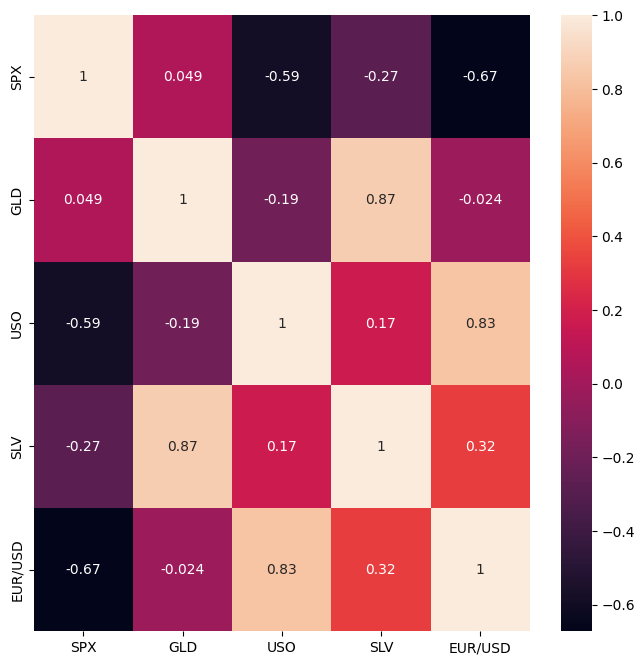

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True)

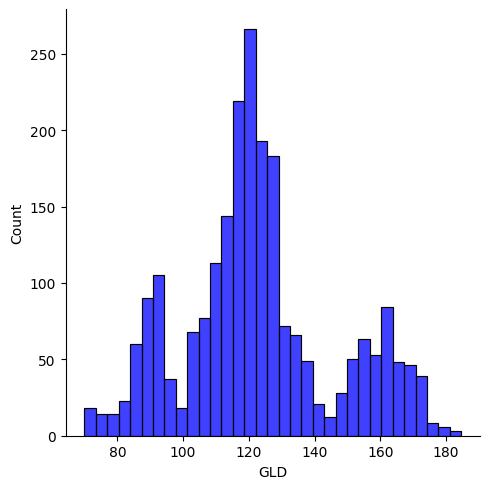

In [ ]:
sns.displot(df['GLD'],color="b")

# Spliting Data Into Dependent & Independent

In [ ]:
X = df[['SPX','USO','SLV','EUR/USD']]
x = X.iloc[:,:].values
x

array([[1.44716003e+03, 7.84700010e+01, 1.51800000e+01, 1.47169200e+00],
       [1.44716003e+03, 7.83700030e+01, 1.52850000e+01, 1.47449100e+00],
       [1.41163000e+03, 7.73099980e+01, 1.51670000e+01, 1.47549200e+00],
       ...,
       [2.72307007e+03, 1.44100000e+01, 1.57400000e+01, 1.19175300e+00],
       [2.73012988e+03, 1.43800000e+01, 1.55600000e+01, 1.19311800e+00],
       [2.72578003e+03, 1.44058000e+01, 1.54542000e+01, 1.18203300e+00]])

In [ ]:
y = df.iloc[:,2].values
y

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

# Spliting into Training & Testing Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x_train.shape

(1832, 4)

In [ ]:
x_test.shape

(458, 4)

In [ ]:
y_train.shape

(1832,)

In [ ]:
y_train.shape

(1832,)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([121.893539  , 142.52364868, 158.91453793, 114.2187805 ,
       110.36659025, 104.50331873, 109.98245681,  92.18483425,
       120.90649253, 123.318912  , 191.2074328 , 118.60055338,
       112.11950573,  93.46765189, 102.30779779,  97.98184003,
       118.85518215,  94.0029039 , 119.86781484, 116.59909644,
       122.21215189, 142.45378454, 121.22332281, 120.62860463,
       163.30049944, 104.70315921, 125.56912816,  87.10875178,
        95.73671386,  86.93309315, 121.81073623, 147.1233332 ,
       144.33048658, 121.95542705, 121.2464489 ,  94.5371824 ,
       152.31281012, 113.94185408, 110.92710898, 182.21152503,
        97.46373243, 128.50200625, 120.48416906, 140.20343573,
       120.16866258,  90.96452083,  82.43780029, 123.52782293,
       144.52004651, 113.76951398, 123.14800018, 159.28339044,
       141.34969761,  88.97598628, 163.39595336, 142.38892627,
       109.31495867, 119.81421995,  93.1108709 , 129.67869305,
       119.96744889, 142.21550112, 115.80809495, 115.07

In [ ]:
accuracy = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for lr :', accuracy)

R-Squared Error for lr : 0.8696713120900417


# Random Forest Model

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(x_test)
y_pred

array([113.36740029, 148.65340062, 140.43319835, 112.703002  ,
       113.82369947,  95.7737994 , 111.83490009,  93.30299943,
       120.81590053, 127.04029955, 147.80529973, 120.47389888,
       119.11070021,  88.13040043,  96.16239997,  92.92459863,
       116.69570103,  88.90999938, 125.29930093, 114.86320007,
       119.10599933, 152.83220147, 122.86779821, 120.25579997,
       171.28440009, 108.41559847, 120.55220072,  87.17699839,
        88.228301  ,  88.42469922, 121.36560061, 154.46210194,
       149.98849825, 125.89199955, 126.86059932,  91.02639885,
       157.12579929, 121.5168016 , 106.74730064, 144.41599671,
        92.54280008, 127.65740117, 117.54840061, 152.45190158,
       119.23839937,  91.36030188,  80.25279953, 120.12620175,
       132.15150024, 119.11499956, 127.35170079, 165.82540063,
       153.35280019,  92.62559892, 148.86020053, 152.07959868,
       112.90200064, 113.00270069,  87.22829928, 127.78519884,
       125.17340068, 151.88480278, 114.38049993, 110.69

In [ ]:
accuracy = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for rf :', accuracy)

R-Squared Error for rf : 0.9880429484468277
